In [323]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os
os.chdir("D:\\USPA - Demand Planning\\1. Data\\Regression\\")

In [325]:
Data = pd.read_csv("Regression Final Data All Stores.csv")

In [326]:
Data.columns

Index(['subbrand', 'materialtype', 'New Store code', 'month', 'sum_gsv',
       'Return Perc', 'Fill Rate', 'Avg_Discount percentage', 'eoss_flag',
       'isfirstmonth', 'ltl_gsv', 'Ugadi_Fest', 'Bihu_Fest', 'Ramzan_Fest',
       'Ganesh_Chaturthi', 'Dusherra_Fest', 'Diwali_Fest', 'Christmas_Fest',
       'New_Year_Fest', 'Holi', 'Labor_Day_Fest', 'Gandhi_Jayanthi_Day_Fest',
       'Good_Friday_Fest', 'Raksha_Bandhan_Fest', 'Eid', 'Prev Period Growth',
       'Prev Yr Growth', 'season type', 'line count', 'Fill Rate UD',
       'Fill Rate US', 'TERRITORY', 'region', 'store_area', 'location_type',
       'city_tier', 'Store Age Weeks', 'BangaloreStore', 'HyderabadStore',
       'DelhiStore', 'MumbaiStore', 'ChennaiStore', 'KolkataStore',
       'MallStore'],
      dtype='object')

In [327]:
Data.sum_gsv.describe()

count    5.678600e+04
mean     1.522852e+05
std      1.613513e+05
min     -6.023429e+04
25%      5.028948e+04
50%      1.015288e+05
75%      1.941553e+05
max      2.090892e+06
Name: sum_gsv, dtype: float64

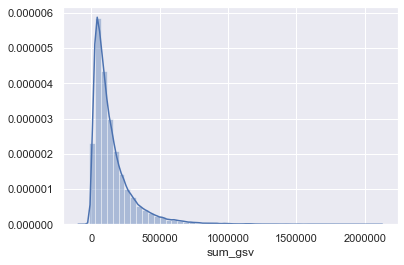

In [329]:
sns.distplot(Data['sum_gsv'])

In [330]:
#skewness and kurtosis
print("Skewness: %f" % Data['sum_gsv'].skew())
print("Kurtosis: %f" % Data['sum_gsv'].kurt())

Skewness: 2.842936
Kurtosis: 12.744982


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


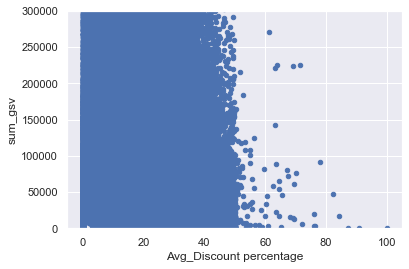

In [331]:
#scatter plot grlivarea/saleprice
var = 'Avg_Discount percentage'
data = pd.concat([Data['sum_gsv'], Data[var]], axis=1)
data.plot.scatter(x=var, y='sum_gsv', ylim=(0,300000));

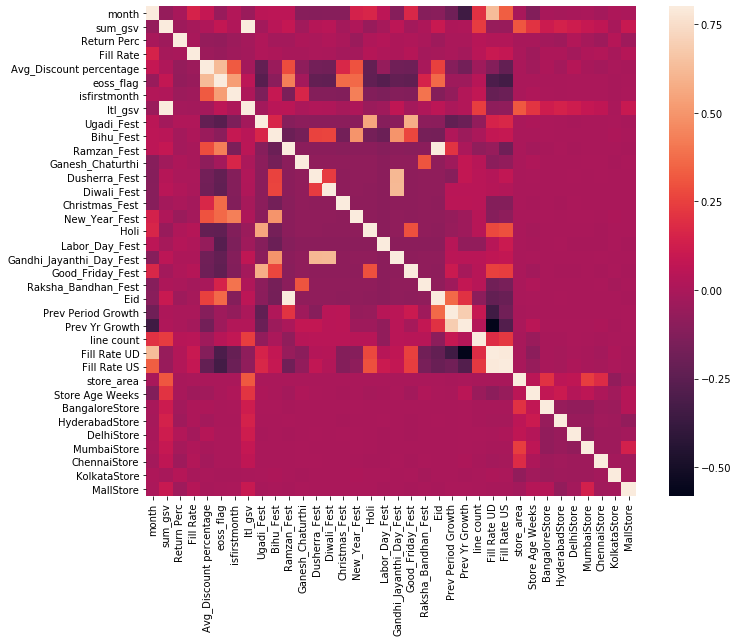

In [9]:
#correlation matrix
corrmat = Data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

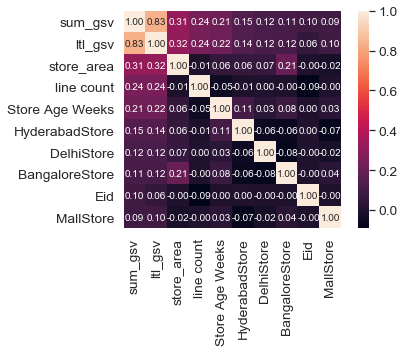

In [10]:
#GSV correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'sum_gsv')['sum_gsv'].index
cm = np.corrcoef(Data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

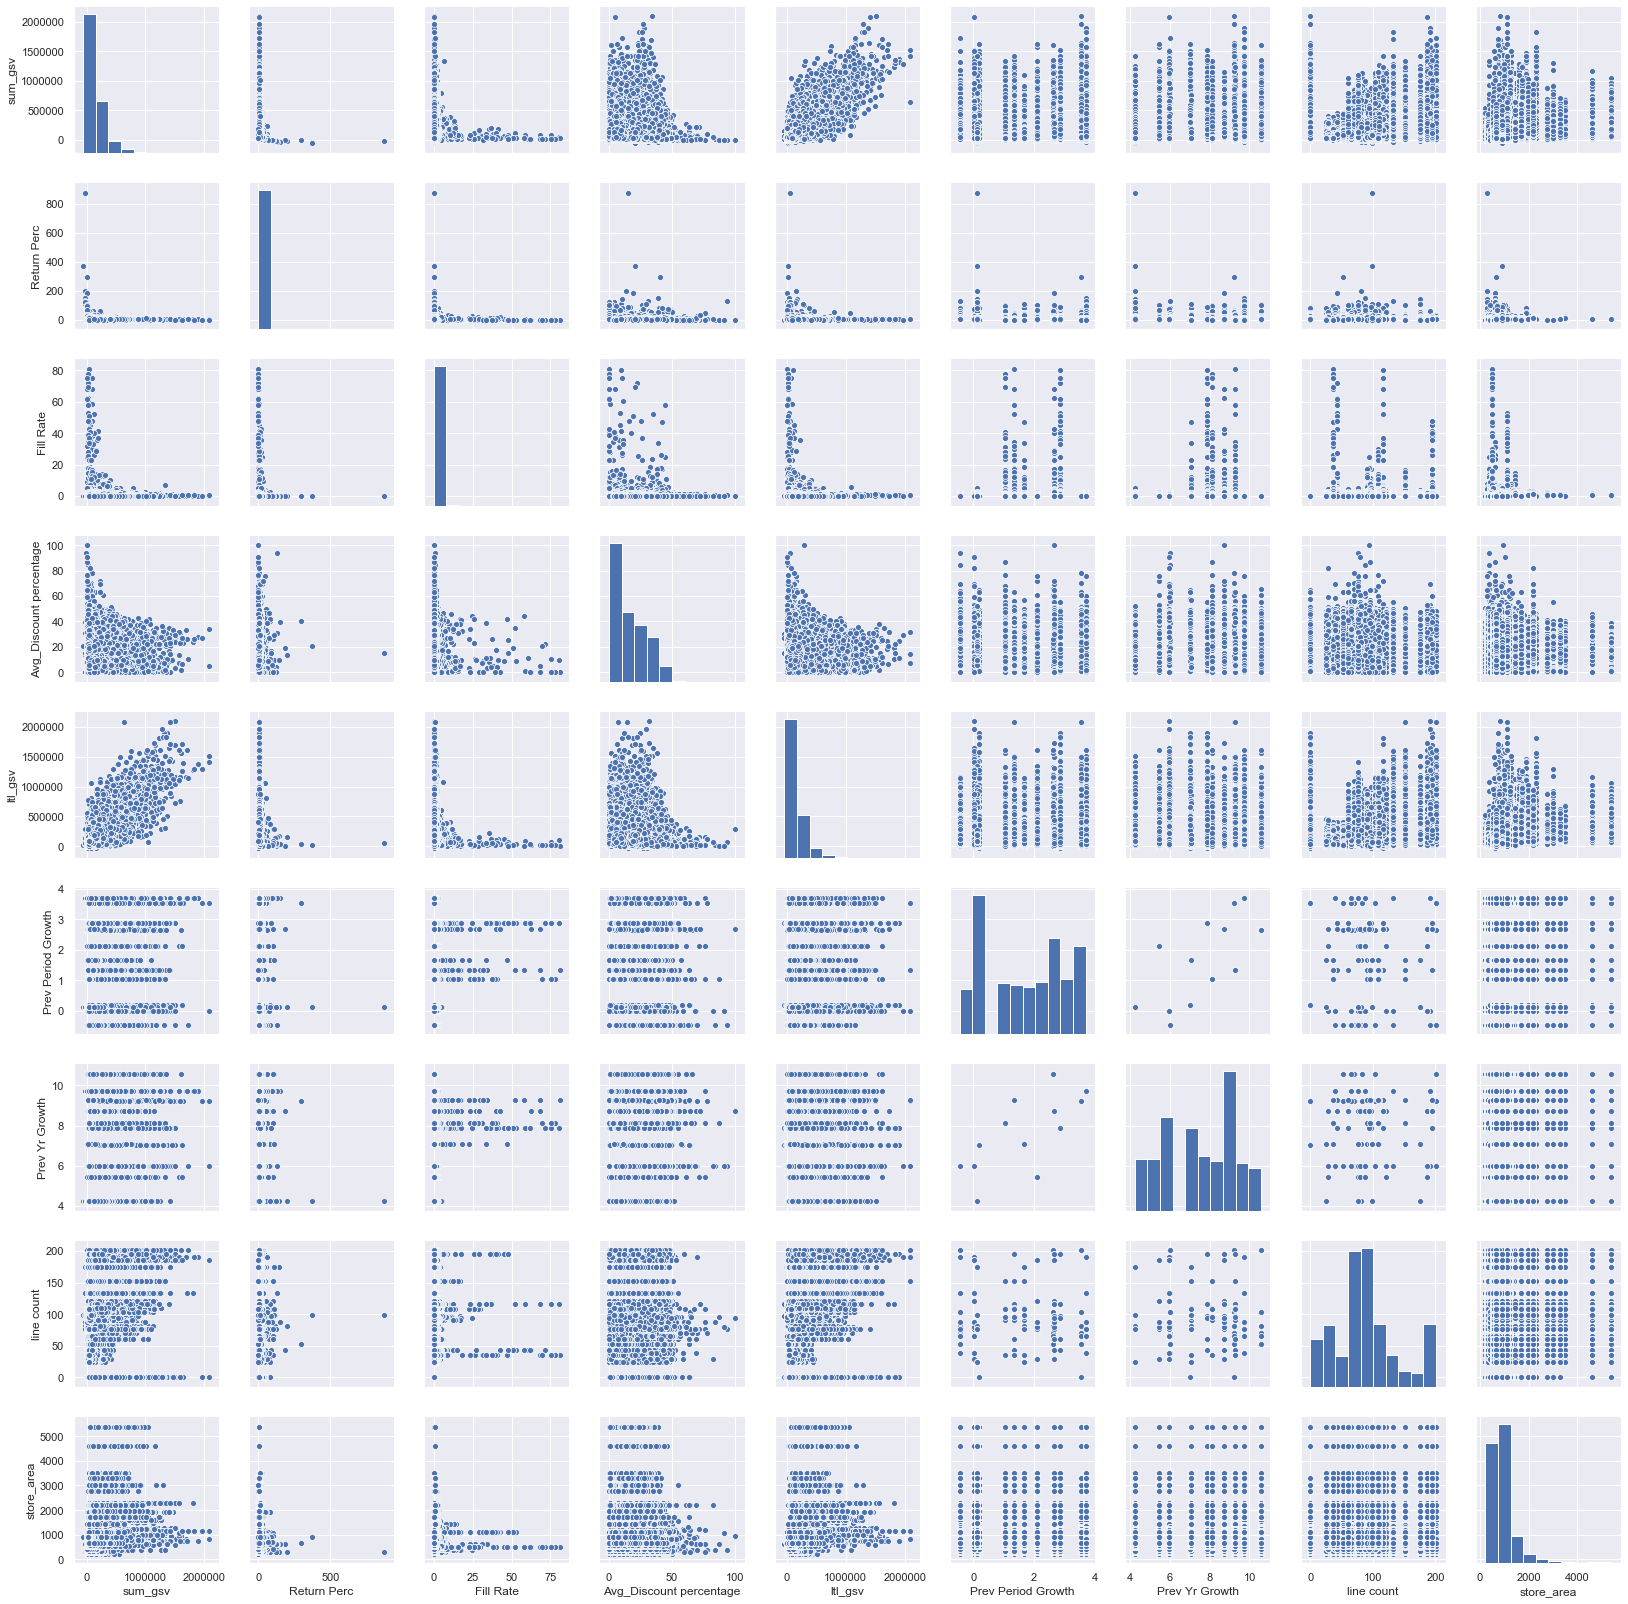

In [11]:
#scatterplot
sns.set()
cols = ['ltl_gsv','Return Perc', 'Fill Rate', 'Avg_Discount percentage', 'ltl_gsv',
        'Prev Period Growth', 'Prev Yr Growth','line count', 'store_area',]
sns.pairplot(Data[cols], size = 2.5)
plt.show();

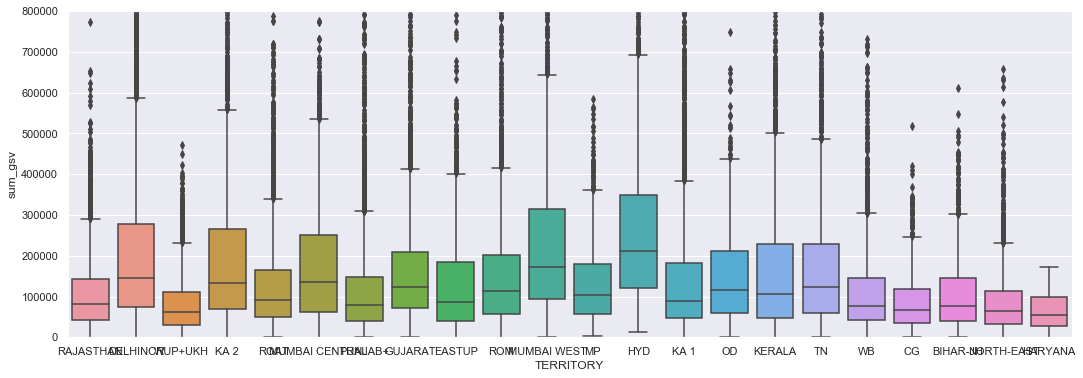

In [16]:
#box plot overallqual/saleprice
var = 'TERRITORY'
data = pd.concat([Data['sum_gsv'], Data[var]], axis=1)
f, ax = plt.subplots(figsize=(18, 6))
fig = sns.boxplot(x=var, y="sum_gsv", data=Data)
fig.axis(ymin=0, ymax=800000);

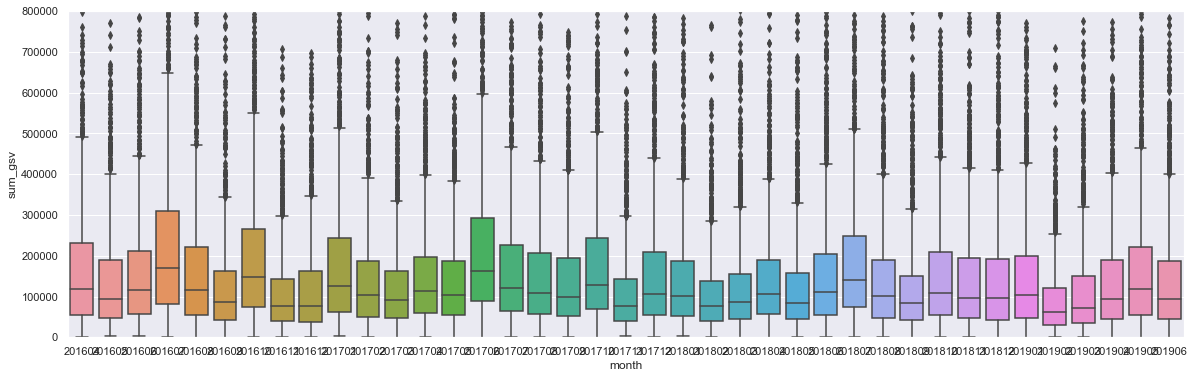

In [18]:
#box plot overallqual/saleprice
var = 'month'
data = pd.concat([Data['sum_gsv'], Data[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y="sum_gsv", data=Data)
fig.axis(ymin=0, ymax=800000);

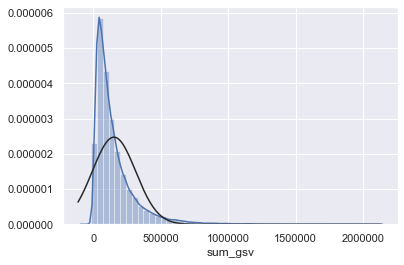

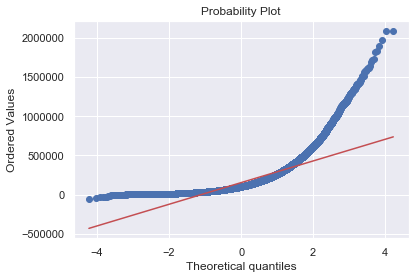

In [19]:
#histogram and normal probability plot
sns.distplot(Data['sum_gsv'], fit=norm);
fig = plt.figure()
res = stats.probplot(Data['sum_gsv'], plot=plt)

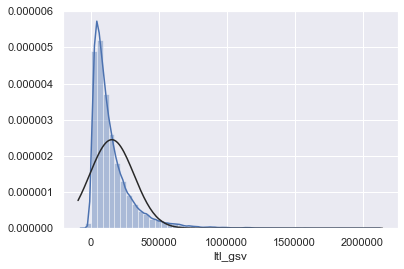

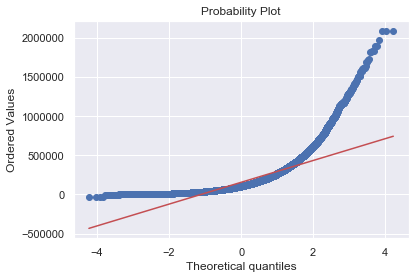

In [20]:
#histogram and normal probability plot
sns.distplot(Data['ltl_gsv'], fit=norm);
fig = plt.figure()
res = stats.probplot(Data['ltl_gsv'], plot=plt)

In [332]:
Data2 = Data
Data2 = Data2.loc[Data2['sum_gsv']>0]
Data2 = Data2.loc[Data2['ltl_gsv']>0]
print(Data.shape)
print(Data2.shape)

(56786, 44)
(56722, 44)


In [333]:
#applying log transformation
Data2['sum_gsv'] = np.log(Data2['sum_gsv'])
Data2['ltl_gsv'] = np.log(Data2['ltl_gsv'])

In [336]:
Data3 = Data2[(Data2['sum_gsv'] > 7) & (Data2['ltl_gsv'] > 7)]

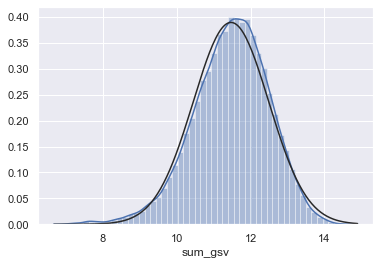

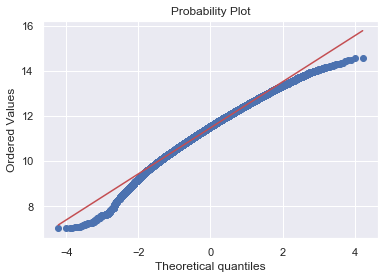

In [337]:
#histogram and normal probability plot
sns.distplot(Data3['sum_gsv'], fit=norm);
fig = plt.figure()
res = stats.probplot(Data3['sum_gsv'], plot=plt)

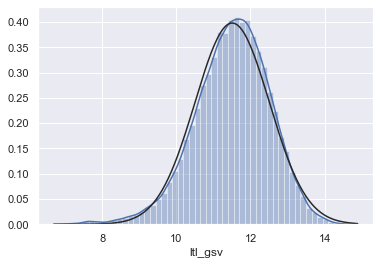

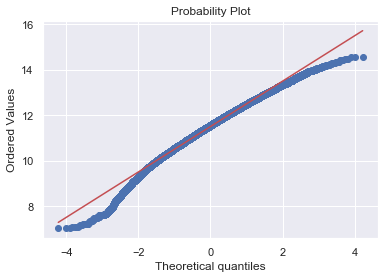

In [338]:
#histogram and normal probability plot
sns.distplot(Data3['ltl_gsv'], fit=norm);
fig = plt.figure()
res = stats.probplot(Data3['ltl_gsv'], plot=plt)

In [339]:
ModelingData = Data3.drop(['New Store code'],axis=1)
print(Data3.shape)
print(ModelingData.shape)

(56689, 44)
(56689, 43)


In [340]:
ModelingData.columns

Index(['subbrand', 'materialtype', 'month', 'sum_gsv', 'Return Perc',
       'Fill Rate', 'Avg_Discount percentage', 'eoss_flag', 'isfirstmonth',
       'ltl_gsv', 'Ugadi_Fest', 'Bihu_Fest', 'Ramzan_Fest', 'Ganesh_Chaturthi',
       'Dusherra_Fest', 'Diwali_Fest', 'Christmas_Fest', 'New_Year_Fest',
       'Holi', 'Labor_Day_Fest', 'Gandhi_Jayanthi_Day_Fest',
       'Good_Friday_Fest', 'Raksha_Bandhan_Fest', 'Eid', 'Prev Period Growth',
       'Prev Yr Growth', 'season type', 'line count', 'Fill Rate UD',
       'Fill Rate US', 'TERRITORY', 'region', 'store_area', 'location_type',
       'city_tier', 'Store Age Weeks', 'BangaloreStore', 'HyderabadStore',
       'DelhiStore', 'MumbaiStore', 'ChennaiStore', 'KolkataStore',
       'MallStore'],
      dtype='object')

In [341]:
Training = ModelingData[(ModelingData['month'] > 201612) & (ModelingData['month'] < 201901)]
Test = ModelingData[(ModelingData['month'] > 201812) & (ModelingData['month'] < 201907)]
print(Training.shape)
print(Test.shape)

(36683, 43)
(9052, 43)


In [342]:
Training_dummy = pd.get_dummies(Training)
Test_dummy = pd.get_dummies(Test)
print(Training_dummy.shape)
print(Test_dummy.shape)

(36683, 76)
(9052, 75)


In [343]:
# Get missing columns in the training test
missing_cols = set( Training_dummy.columns ) - set( Test_dummy.columns )
print(missing_cols)

{'TERRITORY_HARYANA'}


In [344]:
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    Test_dummy[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
Test_dummy = Test_dummy[Training_dummy.columns]

In [345]:
Train_X = Training_dummy.drop(['sum_gsv'],axis=1)
Train_Y = Training_dummy['sum_gsv']
Test_X = Test_dummy.drop(['sum_gsv'],axis=1)
Test_Y = Test_dummy['sum_gsv']

In [245]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=[0, 1])
Train_rescaled = scaler.fit_transform(Train_X.values)
Test_rescaled = scaler.fit_transform(Test_X.values)

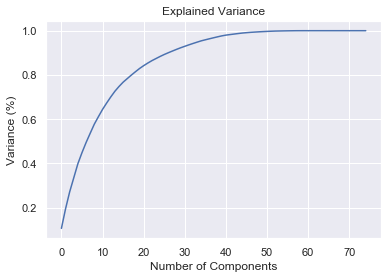

In [246]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(Train_rescaled)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [247]:
pca = PCA(n_components=40)
Train_datapca = pca.fit_transform(Train_rescaled)
Test_datapcs = pca.fit_transform(Test_rescaled)

In [271]:
#missing data
total = Training_dummy.isnull().sum().sort_values(ascending=False)
percent = (Training_dummy.isnull().sum()/Training_dummy.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
city_tier_T3,0,0.0
store_area,0,0.0
Raksha_Bandhan_Fest,0,0.0
Eid,0,0.0
Prev Period Growth,0,0.0
Prev Yr Growth,0,0.0
line count,0,0.0
Fill Rate UD,0,0.0
Fill Rate US,0,0.0
Store Age Weeks,0,0.0


In [295]:
parameters = {   "learning_rate"    : [0.01,0.05, 0.10, 0.15, 0.20] ,
                 "max_depth"        : [ 3, 4, 5, 7, 10],
                 "min_child_weight" : [ 1, 3, 5, 7 ],
                 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
                 "colsample_bytree" : [ 0.5,0.8,1 ],
                 "subsample" : [0.5,0.8,1] }

In [348]:
parameters = {   "learning_rate"    : [0.01] ,
                 "max_depth"        : [ 3,5,7],
                 #"min_child_weight" : [ 1, 3, 5, 7 ],
                 #"gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
                 "colsample_bytree" : [ 0.8],
                 "subsample" : [0.8] }

In [349]:
# Initialize XGB and GridSearch
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
xgb = XGBRegressor(n_estimators = 10000) 
grid = GridSearchCV(xgb, parameters)
grid.fit(Train_X, Train_Y)

[11:53:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:07:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:22:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:36:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:56:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:15:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:34:55] WARNI

KeyboardInterrupt: 

In [309]:
grid.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=5000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.8, verbosity=1)

In [303]:
predictions = grid.best_estimator_.predict(Test_X)

In [291]:
best_xgb_model = xgb.XGBRegressor(colsample_bytree=0.8,
                 gamma=0,                 
                 learning_rate=0.1,
                 max_depth=4,
                 n_estimators=10000,                                                                    
                 #reg_alpha=0.75,
                # reg_lambda=0.45,
                 subsample=0.8,
                 seed=42,
                 objective = 'reg:squarederror')
best_xgb_model.fit(Train_X,Train_Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=10000,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=42, silent=None, subsample=0.8, verbosity=1)

In [285]:
predictions = best_xgb_model.predict(Test_X)

In [248]:
import pickle
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 500, random_state = 42)
# Train the model on training data
rf.fit(Train_datapca, Train_Y);
# save the model to disk
filename = 'StoreModelUSPA_iter1.sav'
pickle.dump(rf, open(filename, 'wb'))

In [176]:
import pandas as pd
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = Train_X.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances)
feature_importances.to_csv("feature_importances.csv")

                         importance
ltl_gsv                    0.646572
Return Perc                0.087208
Avg_Discount percentage    0.049470
Store Age Weeks            0.035564
store_area                 0.032480
line count                 0.021346
month                      0.019120
Fill Rate                  0.019001
Fill Rate UD               0.014802
Fill Rate US               0.013442
Prev Yr Growth             0.007452
materialtype_JN            0.007119
Prev Period Growth         0.006924
materialtype_TS            0.006031
city_tier_M                0.004454
region_SOUTH               0.004100
city_tier_T2               0.003689
region_NORTH               0.003634
materialtype_SH            0.003365
city_tier_T1               0.003285
city_tier_T3               0.003276
TERRITORY_EASTUP           0.002652
TERRITORY_ROAT             0.002568
Diwali_Fest                0.002445


In [249]:
predictions = rf.predict(Test_datapcs)

In [304]:
Predction = pd.DataFrame(predictions, columns = ['Prediction'])

In [305]:
Final = pd.concat([Test.reset_index(drop=True), Predction], axis=1)

In [306]:
Final.columns

Index(['subbrand', 'materialtype', 'month', 'sum_gsv', 'Return Perc',
       'Fill Rate', 'Avg_Discount percentage', 'eoss_flag', 'isfirstmonth',
       'ltl_gsv', 'Ugadi_Fest', 'Bihu_Fest', 'Ramzan_Fest', 'Ganesh_Chaturthi',
       'Dusherra_Fest', 'Diwali_Fest', 'Christmas_Fest', 'New_Year_Fest',
       'Holi', 'Labor_Day_Fest', 'Gandhi_Jayanthi_Day_Fest',
       'Good_Friday_Fest', 'Raksha_Bandhan_Fest', 'Eid', 'Prev Period Growth',
       'Prev Yr Growth', 'season type', 'line count', 'Fill Rate UD',
       'Fill Rate US', 'TERRITORY', 'region', 'store_area', 'location_type',
       'city_tier', 'Store Age Weeks', 'BangaloreStore', 'HyderabadStore',
       'DelhiStore', 'MumbaiStore', 'ChennaiStore', 'KolkataStore',
       'MallStore', 'Prediction'],
      dtype='object')

In [307]:
Final['Actuals'] = np.exp(Final['sum_gsv'])
Final['Predicted'] = np.exp(Final['Prediction'])

In [308]:
Final.to_csv("FinalTest_iter_Xgb_hyperparameter.csv")